In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replacing blanks with 0 as tenrure is 0 and no total charges are recorded

In [22]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",0)
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [23]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
df.isnull().sum().sum()

np.int64(0)

In [25]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [26]:
df["customerID"].duplicated().sum()

np.int64(0)

In [27]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen']= df['SeniorCitizen'].apply(conv)

In [28]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Text(0.5, 1.0, 'Count of customer by Churn')

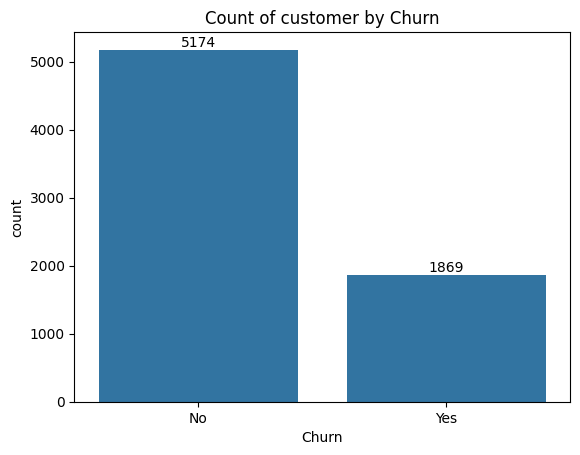

In [29]:
ax= sns.countplot(x=df['Churn'])
ax.bar_label(ax.containers[0])
plt.title("Count of customer by Churn")


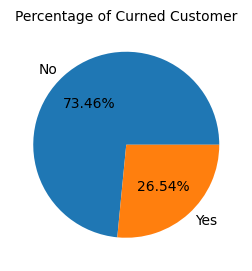

In [30]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({"Churn":"count"})
plt.title("Percentage of Curned Customer", fontsize=10)
plt.pie(gb['Churn'],labels=gb.index, autopct ="%1.2f%%" )
plt.show()

In [31]:
#let's find the reason behind churn

In [32]:
# 1. By Gender analysis

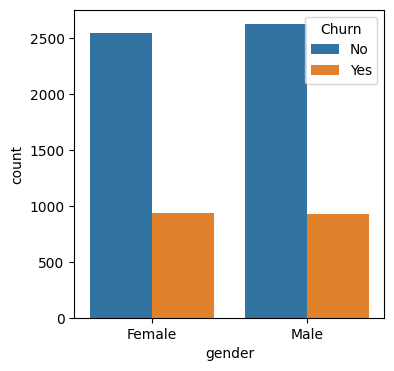

In [33]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender", data=df, hue= "Churn")
plt.show()

In [34]:
# so we get that churn is not dependent on gender basis

Text(0.5, 1.0, 'Count of SeniorCitizen')

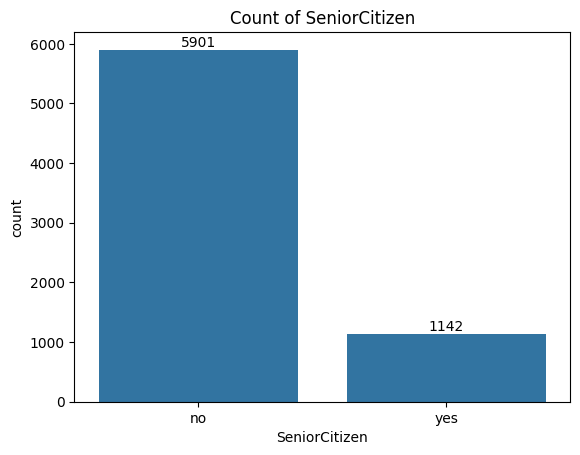

In [35]:
ax= sns.countplot(x=df['SeniorCitizen'])
ax.bar_label(ax.containers[0])
plt.title("Count of SeniorCitizen")


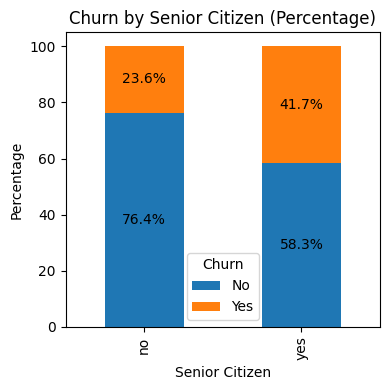

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate counts
count = pd.crosstab(df["SeniorCitizen"], df["Churn"])

# Convert to percentages
percent = count.div(count.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
ax = percent.plot(
    kind="bar",
    stacked=True,
    figsize=(4,4)
)

# Add percentage labels
for container in ax.containers:
    ax.bar_label(
        container,
        label_type="center",
        fmt="%.1f%%"
    )

# Labels & title
ax.set_ylabel("Percentage")
ax.set_xlabel("Senior Citizen")
ax.set_title("Churn by Senior Citizen (Percentage)")
ax.legend(title="Churn")

plt.tight_layout()
plt.show()



comparitively a Greater percentage of people in senior citizen category hhave churned

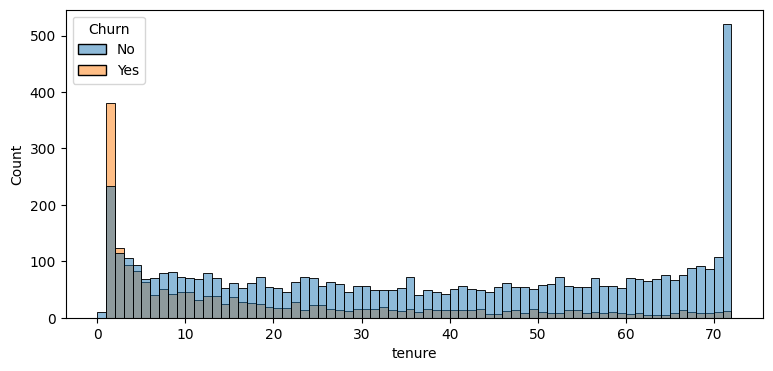

In [37]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure", data=df, bins=72, hue="Churn")
plt.show()

#People who are used our Services for Long Time are stayed and people who have used for 
2 or one months have churned

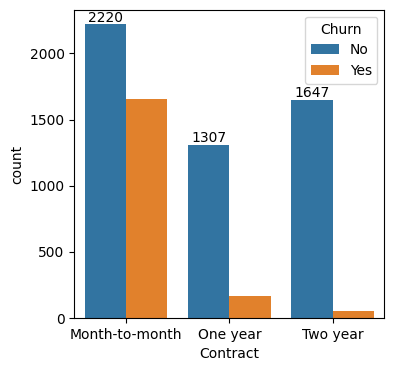

In [40]:

plt.figure(figsize=(4,4))
ax= sns.countplot(x="Contract", data=df, hue= "Churn")
ax.bar_label(ax.containers[0])
plt.show()


People who have Month-to-Month contract are likely to churn then from those who have one or two years of contract

In [41]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

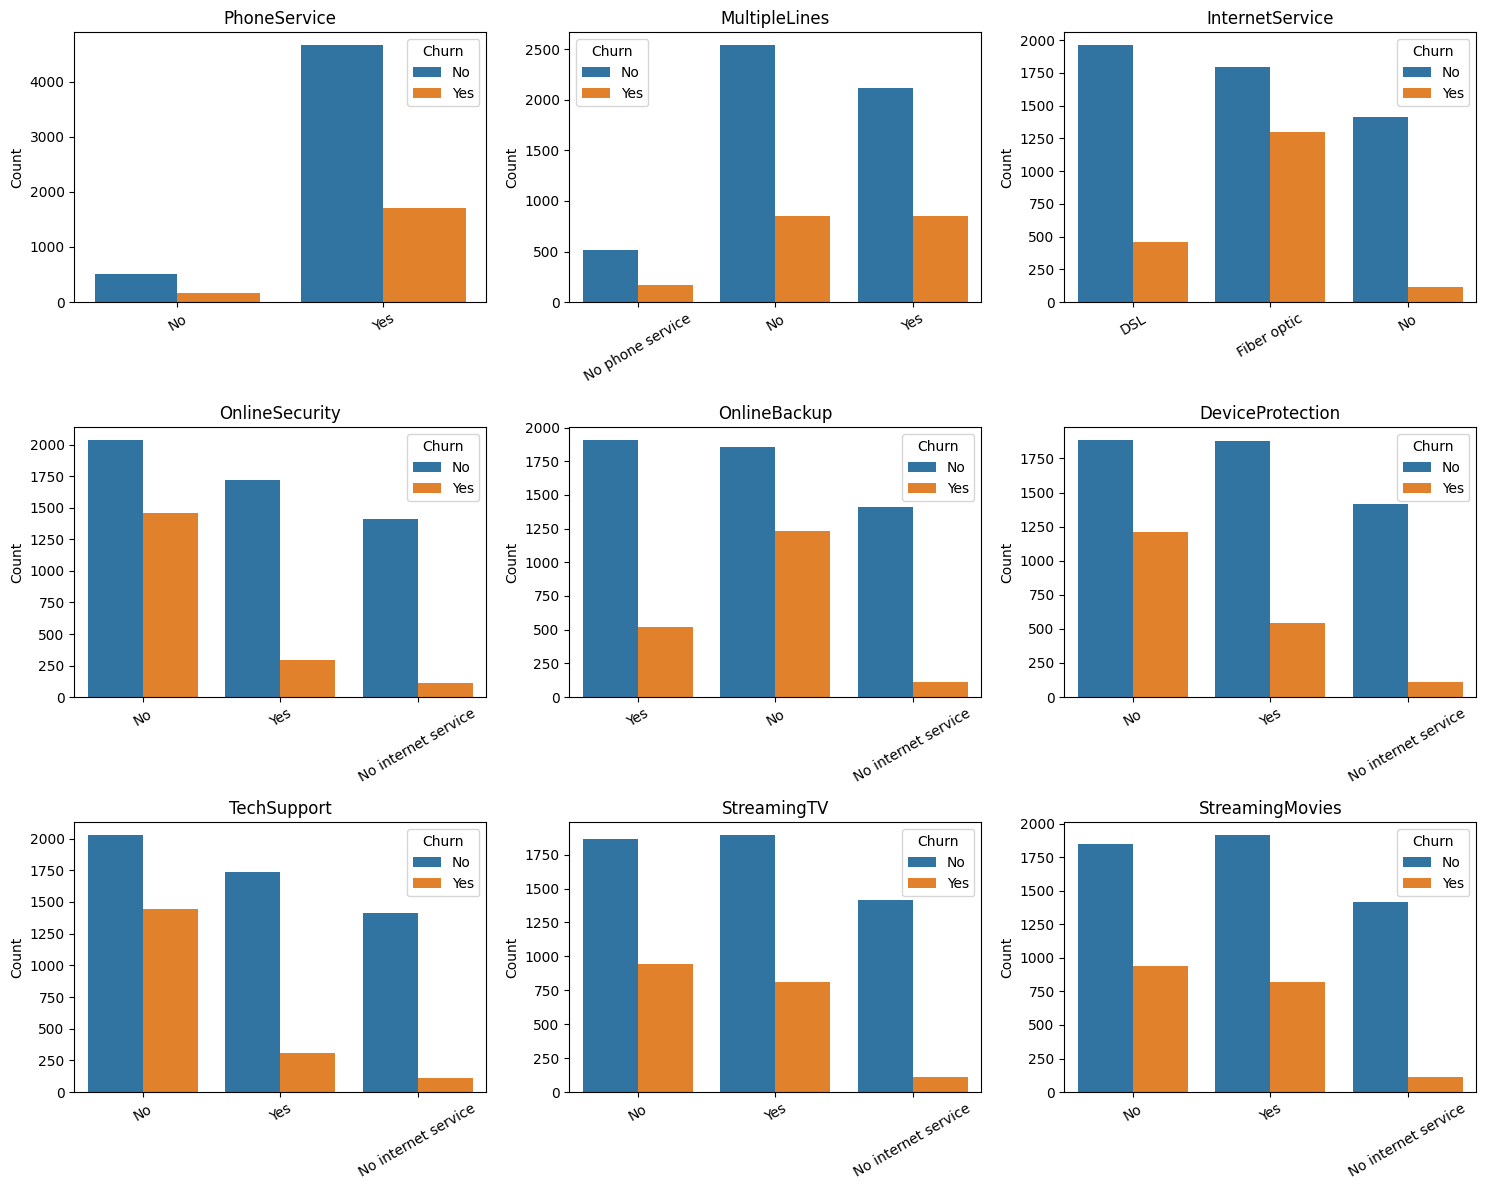

In [43]:


cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set subplot grid size
rows = 3
cols_plot = 3

fig, axes = plt.subplots(rows, cols_plot, figsize=(15, 12))
axes = axes.flatten()  # to iterate easily

for i, col in enumerate(cols):
    sns.countplot(
        data=df,
        x=col,
        ax=axes[i],
        hue="Churn"
    )
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)

# Remove empty subplots if any
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Customers without OnlineSecurity, TechSupport, and DeviceProtection show significantly higher churn, indicating these services strongly help retention. Fiber optic internet users churn more than DSL users, suggesting pricing or service issues. Customers with no internet service have the lowest churn across features. Overall, value-added support and security services reduce churn noticeably.

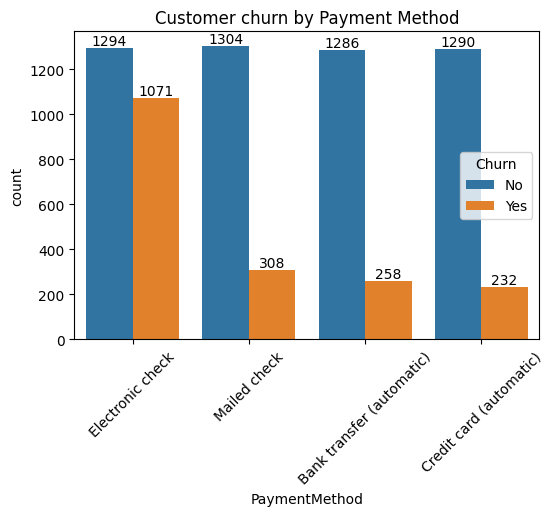

In [47]:

plt.figure(figsize=(6,4))
ax= sns.countplot(x="PaymentMethod", data=df, hue= "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Customer churn by Payment Method")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#people using Electronic Check as there pyment method are likely to churn more than others